## 随机森林

In [1]:
# %matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.data
# wine.target

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

**比对决策树和随机森林**

In [4]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest =train_test_split(wine.data,wine.target,test_size=0.3)
#初始化模型
clf=DecisionTreeClassifier(random_state=22)
rfr=RandomForestClassifier(random_state=22)
#训练模型
clf=clf.fit(Xtrain,ytrain)
rfr=rfr.fit(Xtrain,ytrain)
#查看评分
score_c=clf.score(Xtest,ytest)
score_r=rfr.score(Xtest,ytest)

print('决策树评分：{}'.format(score_c))
print('随机森林评分：{}'.format(score_r))
#多次执行发现，随机森林和决策树的评分提升而提升

决策树评分：0.9444444444444444
随机森林评分：1.0


## 随机森林和决策树在一组交叉验证下的效果对比

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

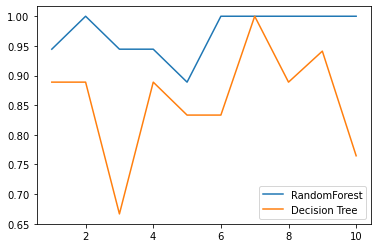

In [15]:
rfr=RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfr,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

RandomForest:
0.9722222222222221
DecisionTree:
0.8705882352941178


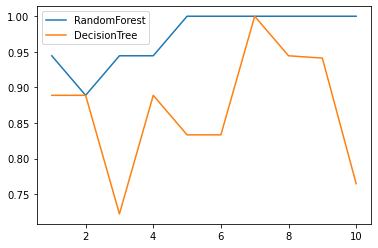

In [21]:
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"

## 对比决策树和随机森林的效果对比（画图展示）

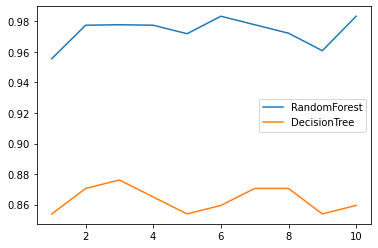

In [16]:
#随机森林验证结果
rfr_list=[]
#决策树验证结果
clf_list=[]

for i in range(10):
    rfr=RandomForestClassifier(n_estimators=25)
    rfr_s=cross_val_score(rfr,wine.data,wine.target,cv=10).mean()
    rfr_list.append(rfr_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_list.append(clf_s)

#画图
plt.plot(range(1,11),rfr_list,label='RandomForest')
plt.plot(range(1,11),clf_list,label='DecisionTree')
plt.legend()
plt.show()


由上图可以看到，随机森林的变化趋势随着决策树的变化而变化

**随机森林的n_estimators曲线**

0.9888888888888889 21


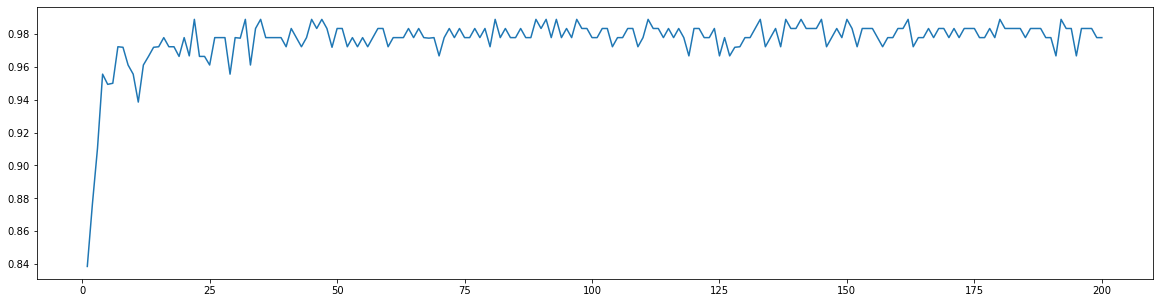

In [22]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

**基分类器和集成算法预测误差率曲线**  
可以看出： 当基分类器的误差率小于50%时，集成算法的误差率会更低;  
当基分类器的误差率大于50%时，集成算法的误差率会更高。

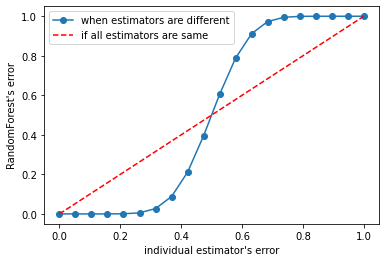

In [43]:
import numpy as np
from scipy.special import comb
x = np.linspace(0,1,20) 
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

**使用袋外数据进行测试**

In [44]:
# 不划分训练集和测试集，使用袋外数据进行预测
rfc=RandomForestClassifier(n_estimators=20,oob_score=True)
rfc.fit(wine.data,wine.target)

# 袋外数据预测分数
rfc.oob_score_

0.9831460674157303

In [45]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, ytrain)
rfc.score(Xtest,ytest)
rfc.feature_importances_

array([0.15000237, 0.03219596, 0.00706187, 0.0413816 , 0.02045177,
       0.03676884, 0.13060746, 0.01316579, 0.0447998 , 0.1395495 ,
       0.05662523, 0.17247631, 0.15491351])

In [46]:
rfc.apply(Xtest)

array([[ 2, 10,  4, ...,  2,  2,  2],
       [ 2,  2, 11, ..., 15,  2,  3],
       [18, 13, 16, ..., 15, 13, 13],
       ...,
       [15, 13, 16, ..., 15, 13, 11],
       [ 5,  2,  6, ...,  3,  8, 10],
       [18, 13, 16, ..., 15, 13, 13]])

In [47]:
#返回预测标签
rfc.predict(Xtest)

array([1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 2, 0])

In [ ]:
#预测概率
rfc.predict_proba(Xtest)

## 随机森林回归

In [49]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
boston=load_boston()
rfr=RandomForestRegressor(n_estimators=100,random_state=22)
cross_val_score(rfr,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')

array([-10.89487953,  -5.31776661,  -4.31912437, -21.87649598,
       -11.26579249, -21.72462755,  -6.99993176, -98.80396926,
       -24.8766972 , -13.34767214])

In [ ]:
#所有模型的评价指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

## 使用随机森林填补缺失值

**导入数据包**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

**导入数据集并进行探索**

In [56]:
#导入波士顿房价数据集
data=load_boston()
data.data.shape

(506, 13)

In [61]:
x_full,y_full=data.data,data.target
n_samples=x_full.shape[0]
n_features=x_full.shape[1]
print(str(n_samples)+'----'+str(n_features))

506----13


## 随机森林在乳腺癌数据上的调参

**导入需要的库**

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
dat=load_breast_cancer()

print(dat.data.shape)
print(dat.target.shape)

(569, 30)
(569,)


**建模，查看数据集效果**

In [72]:
cfr=RandomForestClassifier(n_estimators=100,random_state=33)
cross_val_score(cfr,dat.data,dat.target,cv=10).mean()

0.968421052631579

**第一步，调整n_estimators**

In [75]:
score_list=[]
for i in range(1,201,10):
    rfc=RandomForestClassifier(n_estimators=i,random_state=33,n_jobs=-1)
    score=cross_val_score(rfc,dat.data,dat.target,cv=10).mean()
    score_list.append(score)

0.9666666666666668 40


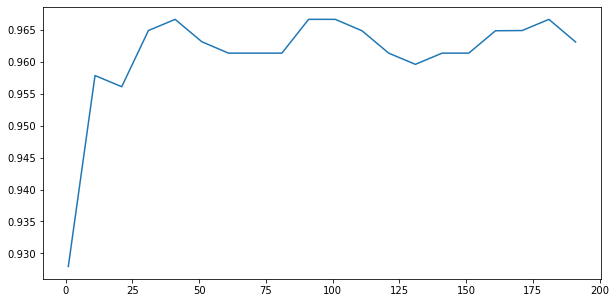

In [90]:
print(max(score_list),score_list.index(max(score_list))*10)
plt.figure(figsize=[10,5])
plt.plot(range(1,201,10),score_list)
plt.show()

0.9666666666666668 36


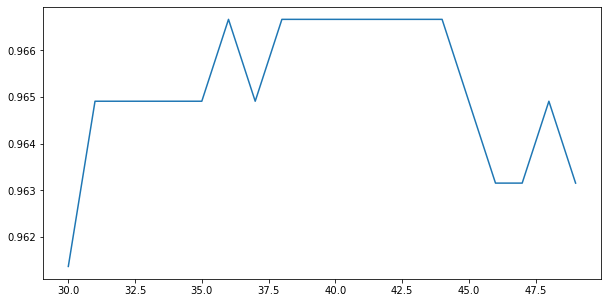

In [93]:
score_list=[]
for i in range(30,50):
    rfc=RandomForestClassifier(n_estimators=i,random_state=33,n_jobs=-1)
    score=cross_val_score(rfc,dat.data,dat.target,cv=10).mean()
    score_list.append(score)
print(max(score_list),score_list.index(max(score_list))+30)
plt.figure(figsize=[10,5])
plt.plot(range(30,50),score_list)
plt.show()

In [95]:
rfc=RandomForestClassifier(n_estimators=36,random_state=33,n_jobs=-1)
cross_val_score(rfc,dat.data,dat.target,cv=10).mean()

0.9666666666666668

In [97]:
#调整max_depth
param_grid={'max_depth':np.arange(1,20,1)}
rfc=RandomForestClassifier(n_estimators=36,random_state=33)
GS=GridSearchCV(rfc,param_grid=param_grid,cv=10)
GS.fit(dat.data,dat.target)
GS.best_params_

{'max_depth': 9}

In [98]:
GS.best_score_
#模型分数有提升，所以模型之前是过拟合


0.968421052631579

In [99]:
rfc=RandomForestClassifier(n_estimators=36,random_state=33,max_depth=9)
cross_val_score(rfc,dat.data,dat.target,cv=10).mean()

0.968421052631579

In [126]:
#调整 min_samples_leaf 
param_grid={'min_samples_leaf':np.arange(1,20,1)}
rfc=RandomForestClassifier(n_estimators=36,random_state=33,max_depth=9)
GS=GridSearchCV(rfc,param_grid=param_grid,cv=10)
GS.fit(dat.data,dat.target)
GS.best_score_

#分数没有提高，不调整此参数

0.968421052631579

In [ ]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(1,100,5)}
rfc=RandomForestClassifier(n_estimators=36,random_state=33,max_depth=9)
GS=GridSearchCV(rfc,param_grid=param_grid,cv=10)
GS.fit(dat.data,dat.target)
GS.best_score_

In [ ]:

#调整max_features
param_grid={'max_features':np.arange(0,101,1)}
rfc=RandomForestClassifier(n_estimators=36,random_state=33,max_depth=9)
GS=GridSearchCV(rfc,param_grid=param_grid,cv=10)
GS.fit(dat.data,dat.target)
GS.best_score_

In [122]:
#调整criterion
param_grid={'criterion':['gini','entropy']}
rfc=RandomForestClassifier(n_estimators=36,random_state=33,max_depth=9)
GS=GridSearchCV(rfc,param_grid=param_grid,cv=10)
GS.fit(dat.data,dat.target)
GS.best_score_

0.968421052631579